In [1]:
import requests
import json
from config import api_key_census
import census
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
import us
from us import states
from scipy.stats import linregress
from scipy import stats
import numpy as np

In [2]:
## Open clean data files
census_value_cost_2017_clean= pd.read_csv('HH_Value_And_Cost2017_Clean_NN.csv')
census_value_cost_2016_clean= pd.read_csv('HH_Value_And_Cost2016_Clean_NN.csv')
census_value_cost_2015_clean= pd.read_csv('HH_Value_And_Cost2015_Clean_NN.csv')
census_value_cost_2014_clean= pd.read_csv('HH_Value_And_Cost2014_Clean_NN.csv')
census_value_cost_2013_clean= pd.read_csv('HH_Value_And_Cost2013_Clean_NN.csv')
census_value_cost_2012_clean= pd.read_csv('HH_Value_And_Cost2012_Clean_NN.csv')
census_value_cost_2011_clean= pd.read_csv('HH_Value_And_Cost2011_Clean_NN.csv')
census_value_cost_2011_clean

,Zipcode,Total Housing Unit,Median Value,Lower value quartile (dollars),Upper value quartile (dollars),Median monthly housing costs,Cities,Houston Area Detail
0,77002.0,3513.0,220400.0,160500.0,310600.0,1184.0,Houston,Inner Loop
1,77003.0,4655.0,112500.0,79100.0,213000.0,696.0,Houston,Inner Loop
2,77004.0,16581.0,209000.0,121800.0,275000.0,790.0,Houston,Inner Loop
3,77005.0,10331.0,689600.0,476500.0,972000.0,2318.0,Houston,Inner Loop
4,77006.0,13141.0,329500.0,209500.0,441200.0,1169.0,Houston,Inner Loop
...,...,...,...,...,...,...,...,...
125,77562.0,3993.0,91500.0,54100.0,135100.0,863.0,Highlands,Other Cities
126,77571.0,13267.0,119700.0,98000.0,149300.0,1143.0,La Porte,Other Cities
127,77586.0,9491.0,192100.0,145700.0,244500.0,1259.0,Seabrook,Other Cities
128,77587.0,5586.0,87400.0,59300.0,110200.0,691.0,South Houston,Other Cities


In [3]:
### Create extra Dataframe for Houston Area and other cities to plot
houston_city_group_2017=census_value_cost_2017_clean.groupby(['Cities'])
houston_city_group_2016=census_value_cost_2016_clean.groupby(['Cities'])
houston_city_group_2015=census_value_cost_2015_clean.groupby(['Cities'])
houston_city_group_2014=census_value_cost_2014_clean.groupby(['Cities'])
houston_city_group_2013=census_value_cost_2013_clean.groupby(['Cities'])
houston_city_group_2012=census_value_cost_2012_clean.groupby(['Cities'])
houston_city_group_2011=census_value_cost_2011_clean.groupby(['Cities'])

median_value_2017_houston_city=houston_city_group_2017['Median Value'].mean()
median_value_2016_houston_city=houston_city_group_2016['Median Value'].mean()
median_value_2015_houston_city=houston_city_group_2015['Median Value'].mean()
median_value_2014_houston_city=houston_city_group_2014['Median Value'].mean()
median_value_2013_houston_city=houston_city_group_2013['Median Value'].mean()
median_value_2012_houston_city=houston_city_group_2012['Median Value'].mean()
median_value_2011_houston_city=houston_city_group_2011['Median Value'].mean()

median_value_2017_houston_city.reset_index()
median_value_2016_houston_city.reset_index()
median_value_2015_houston_city.reset_index()
median_value_2014_houston_city.reset_index()
median_value_2013_houston_city.reset_index()
median_value_2012_houston_city.reset_index()
median_value_2011_houston_city.reset_index()
                                                      
median_value_houston_city=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_value_2011_houston_city,median_value_2012_houston_city,on='Cities',suffixes=("_2011", "_2012")),
                              median_value_2013_houston_city,on='Cities'),
                              median_value_2014_houston_city,on='Cities',suffixes=("_2013", "_2014")),
                              median_value_2015_houston_city,on='Cities'),
                              median_value_2016_houston_city,on='Cities',suffixes=("_2015", "_2016")),
                              median_value_2017_houston_city,on='Cities')
median_value_houston_city=median_value_houston_city.rename(columns={'Median Value':'Median Value_2017'})
median_value_houston_city.head()

,Median Value_2011,Median Value_2012,Median Value_2013,Median Value_2014,Median Value_2015,Median Value_2016,Median Value_2017
Cities,,,,,,,
Baytown,100300.0,99200.0,98050.0,97450.0,98750.0,101550.0,107850.0
Bellaire,538700.0,557500.0,608300.0,645000.0,708800.0,768800.0,802300.0
Channelview,87500.0,88300.0,86900.0,85600.0,85700.0,88000.0,91500.0
Crosby,118600.0,119300.0,121000.0,123500.0,123200.0,126300.0,135300.0
Cypress2,181450.0,181750.0,180050.0,185100.0,194900.0,210400.0,221400.0


In [4]:
### Create extra Dataframe for Houston Area and other cities to plot

median_cost_2017_houston_city=houston_city_group_2017['Median monthly housing costs'].mean()
median_cost_2016_houston_city=houston_city_group_2016['Median monthly housing costs'].mean()
median_cost_2015_houston_city=houston_city_group_2015['Median monthly housing costs'].mean()
median_cost_2014_houston_city=houston_city_group_2014['Median monthly housing costs'].mean()
median_cost_2013_houston_city=houston_city_group_2013['Median monthly housing costs'].mean()
median_cost_2012_houston_city=houston_city_group_2012['Median monthly housing costs'].mean()
median_cost_2011_houston_city=houston_city_group_2011['Median monthly housing costs'].mean()

median_cost_2017_houston_city.reset_index()
median_cost_2016_houston_city.reset_index()
median_cost_2015_houston_city.reset_index()
median_cost_2014_houston_city.reset_index()
median_cost_2013_houston_city.reset_index()
median_cost_2012_houston_city.reset_index()
median_cost_2011_houston_city.reset_index()
                                                      
median_cost_houston_city=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_cost_2011_houston_city,median_cost_2012_houston_city,on='Cities',suffixes=("_2011", "_2012")),
                              median_cost_2013_houston_city,on='Cities'),
                              median_cost_2014_houston_city,on='Cities',suffixes=("_2013", "_2014")),
                              median_cost_2015_houston_city,on='Cities'),
                              median_cost_2016_houston_city,on='Cities',suffixes=("_2015", "_2016")),
                              median_cost_2017_houston_city,on='Cities')
median_cost_houston_city=median_cost_houston_city.rename(columns={'Median monthly housing costs':'Median monthly housing costs_2017'})
median_cost_houston_city.head()

,Median monthly housing costs_2011,Median monthly housing costs_2012,Median monthly housing costs_2013,Median monthly housing costs_2014,Median monthly housing costs_2015,Median monthly housing costs_2016,Median monthly housing costs_2017
Cities,,,,,,,
Baytown,856.0,870.0,874.5,866.5,843.5,860.0,883.0
Bellaire,1999.0,1985.0,2146.0,2159.0,2278.0,2380.0,2368.0
Channelview,892.0,878.0,894.0,913.0,882.0,871.0,877.0
Crosby,956.0,993.0,1018.0,1047.0,1013.0,1020.0,1054.0
Cypress2,1640.0,1620.5,1577.5,1551.0,1545.0,1561.5,1601.5


In [5]:
### Create extra Dataframe for Houston Area to plot

house_city_list=median_value_houston_city.values.tolist()

houston_area_group_2017=census_value_cost_2017_clean.groupby(['Houston Area Detail'])
houston_area_group_2016=census_value_cost_2016_clean.groupby(['Houston Area Detail'])
houston_area_group_2015=census_value_cost_2015_clean.groupby(['Houston Area Detail'])
houston_area_group_2014=census_value_cost_2014_clean.groupby(['Houston Area Detail'])
houston_area_group_2013=census_value_cost_2013_clean.groupby(['Houston Area Detail'])
houston_area_group_2012=census_value_cost_2012_clean.groupby(['Houston Area Detail'])
houston_area_group_2011=census_value_cost_2011_clean.groupby(['Houston Area Detail'])

median_value_2017_houston=houston_area_group_2017['Median Value'].mean()
median_value_2016_houston=houston_area_group_2016['Median Value'].mean()
median_value_2015_houston=houston_area_group_2015['Median Value'].mean()
median_value_2014_houston=houston_area_group_2014['Median Value'].mean()
median_value_2013_houston=houston_area_group_2013['Median Value'].mean()
median_value_2012_houston=houston_area_group_2012['Median Value'].mean()
median_value_2011_houston=houston_area_group_2011['Median Value'].mean()

median_value_2017_houston=houston_area_group_2017['Median Value'].mean()
median_value_2016_houston=houston_area_group_2016['Median Value'].mean()
median_value_2015_houston=houston_area_group_2015['Median Value'].mean()
median_value_2014_houston=houston_area_group_2014['Median Value'].mean()
median_value_2013_houston=houston_area_group_2013['Median Value'].mean()
median_value_2012_houston=houston_area_group_2012['Median Value'].mean()
median_value_2011_houston=houston_area_group_2011['Median Value'].mean()

median_value_2017_houston.reset_index()
median_value_2016_houston.reset_index()
median_value_2015_houston.reset_index()
median_value_2014_houston.reset_index()
median_value_2013_houston.reset_index()
median_value_2012_houston.reset_index()
median_value_2011_houston.reset_index()

median_value_houston=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_value_2011_houston,median_value_2012_houston,on='Houston Area Detail',suffixes=("_2011", "_2012")),
                              median_value_2013_houston,on='Houston Area Detail'),
                              median_value_2014_houston,on='Houston Area Detail',suffixes=("_2013", "_2014")),
                              median_value_2015_houston,on='Houston Area Detail'),
                              median_value_2016_houston,on='Houston Area Detail',suffixes=("_2015", "_2016")),
                              median_value_2017_houston,on='Houston Area Detail')
median_value_houston=median_value_houston.rename(columns={'Median Value':'Median Value_2017'})

median_value_houston.loc['Total Houston Area'] = house_city_list[9]
median_value_houston_only=median_value_houston.drop('Other Cities')
houston_area_list=median_value_houston_only.values.tolist()
median_value_houston_only.head()

,Median Value_2011,Median Value_2012,Median Value_2013,Median Value_2014,Median Value_2015,Median Value_2016,Median Value_2017
Houston Area Detail,,,,,,,
Inner Loop,246928.571429,249128.571429,257766.666667,267142.857143,284000.000000,298142.857143,318614.285714
Northeast,89140.000000,87413.333333,86446.666667,84693.333333,87626.666667,89986.666667,93953.333333
Northwest,140519.047619,139733.333333,140071.428571,143328.571429,149433.333333,159238.095238,170866.666667
Southeast,113138.461538,114223.076923,113500.000000,114369.230769,115761.538462,119246.153846,123676.923077
Southwest,202833.333333,206409.523810,207761.904762,214652.380952,222509.523810,236757.142857,253085.714286


In [6]:
### Create extra Dataframe for Houston Area to plot
value_houston_innerloop_2017=census_value_cost_2017_clean.loc[census_value_cost_2017_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2017=census_value_cost_2017_clean.loc[census_value_cost_2017_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2017=census_value_cost_2017_clean.loc[census_value_cost_2017_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2017=census_value_cost_2017_clean.loc[census_value_cost_2017_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2017=census_value_cost_2017_clean.loc[census_value_cost_2017_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2016=census_value_cost_2016_clean.loc[census_value_cost_2016_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2016=census_value_cost_2016_clean.loc[census_value_cost_2016_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2016=census_value_cost_2016_clean.loc[census_value_cost_2016_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2016=census_value_cost_2016_clean.loc[census_value_cost_2016_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2016=census_value_cost_2016_clean.loc[census_value_cost_2016_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2015=census_value_cost_2015_clean.loc[census_value_cost_2015_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2015=census_value_cost_2015_clean.loc[census_value_cost_2015_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2015=census_value_cost_2015_clean.loc[census_value_cost_2015_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2015=census_value_cost_2015_clean.loc[census_value_cost_2015_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2015=census_value_cost_2015_clean.loc[census_value_cost_2015_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2014=census_value_cost_2014_clean.loc[census_value_cost_2014_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2014=census_value_cost_2014_clean.loc[census_value_cost_2014_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2014=census_value_cost_2014_clean.loc[census_value_cost_2014_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2014=census_value_cost_2014_clean.loc[census_value_cost_2014_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2014=census_value_cost_2014_clean.loc[census_value_cost_2014_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2013=census_value_cost_2013_clean.loc[census_value_cost_2013_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2013=census_value_cost_2013_clean.loc[census_value_cost_2013_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2013=census_value_cost_2013_clean.loc[census_value_cost_2013_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2013=census_value_cost_2013_clean.loc[census_value_cost_2013_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2013=census_value_cost_2013_clean.loc[census_value_cost_2013_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2012=census_value_cost_2012_clean.loc[census_value_cost_2012_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2012=census_value_cost_2012_clean.loc[census_value_cost_2012_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2012=census_value_cost_2012_clean.loc[census_value_cost_2012_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2012=census_value_cost_2012_clean.loc[census_value_cost_2012_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2012=census_value_cost_2012_clean.loc[census_value_cost_2012_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_innerloop_2011=census_value_cost_2011_clean.loc[census_value_cost_2011_clean["Houston Area Detail"]=='Inner Loop',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northeast_2011=census_value_cost_2011_clean.loc[census_value_cost_2011_clean["Houston Area Detail"]=='Northeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_northwest_2011=census_value_cost_2011_clean.loc[census_value_cost_2011_clean["Houston Area Detail"]=='Northwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southeast_2011=census_value_cost_2011_clean.loc[census_value_cost_2011_clean["Houston Area Detail"]=='Southeast',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2011=census_value_cost_2011_clean.loc[census_value_cost_2011_clean["Houston Area Detail"]=='Southwest',
                                     ['Zipcode','Total Housing Unit','Median Value', 'Median monthly housing costs']]
value_houston_southwest_2011

,Zipcode,Total Housing Unit,Median Value,Median monthly housing costs
21,77024.0,15799.0,600300.0,1728.0
28,77031.0,6660.0,121400.0,832.0
32,77035.0,16270.0,142300.0,799.0
33,77036.0,31058.0,116400.0,690.0
39,77042.0,20874.0,199700.0,904.0
42,77045.0,9802.0,89300.0,961.0
51,77056.0,11896.0,546800.0,1460.0
52,77057.0,22857.0,229200.0,1024.0
58,77063.0,19648.0,191100.0,901.0
66,77071.0,10766.0,124300.0,939.0


In [7]:
### Create extra Dataframe for Houston Area to plot

house_city_cost_list=median_cost_houston_city.values.tolist()

median_cost_2017_houston=houston_area_group_2017['Median monthly housing costs'].mean()
median_cost_2016_houston=houston_area_group_2016['Median monthly housing costs'].mean()
median_cost_2015_houston=houston_area_group_2015['Median monthly housing costs'].mean()
median_cost_2014_houston=houston_area_group_2014['Median monthly housing costs'].mean()
median_cost_2013_houston=houston_area_group_2013['Median monthly housing costs'].mean()
median_cost_2012_houston=houston_area_group_2012['Median monthly housing costs'].mean()
median_cost_2011_houston=houston_area_group_2011['Median monthly housing costs'].mean()

median_cost_2017_houston.reset_index()
median_cost_2016_houston.reset_index()
median_cost_2015_houston.reset_index()
median_cost_2014_houston.reset_index()
median_cost_2013_houston.reset_index()
median_cost_2012_houston.reset_index()
median_cost_2011_houston.reset_index()

median_cost_houston=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(median_cost_2011_houston,median_cost_2012_houston,on='Houston Area Detail',suffixes=("_2011", "_2012")),
                              median_cost_2013_houston,on='Houston Area Detail'),
                              median_cost_2014_houston,on='Houston Area Detail',suffixes=("_2013", "_2014")),
                              median_cost_2015_houston,on='Houston Area Detail'),
                              median_cost_2016_houston,on='Houston Area Detail',suffixes=("_2015", "_2016")),
                              median_cost_2017_houston,on='Houston Area Detail')
median_cost_houston=median_cost_houston.rename(columns={'Median monthly housing costs':'Median monthly housing costs_2017'})

median_cost_houston.loc['Total Houston Area'] = house_city_cost_list[9]
median_cost_houston_only=median_cost_houston.drop('Other Cities')
houston_cost_list=median_cost_houston_only.values.tolist()
median_cost_houston_only

,Median monthly housing costs_2011,Median monthly housing costs_2012,Median monthly housing costs_2013,Median monthly housing costs_2014,Median monthly housing costs_2015,Median monthly housing costs_2016,Median monthly housing costs_2017
Houston Area Detail,,,,,,,
Inner Loop,1052.428571,1092.142857,1123.714286,1158.619048,1187.619048,1221.190476,1274.714286
Northeast,830.600000,833.200000,820.933333,814.266667,802.933333,801.466667,826.600000
Northwest,1036.809524,1030.476190,1021.380952,1021.809524,1007.619048,1026.476190,1048.857143
Southeast,943.000000,955.846154,947.000000,936.461538,928.153846,936.230769,949.538462
Southwest,1072.904762,1063.809524,1064.095238,1067.333333,1068.666667,1079.047619,1123.190476
Total Houston Area,994.234043,1001.159574,1002.329787,1008.585106,1008.468085,1023.765957,1056.776596


<Figure size 432x288 with 0 Axes>

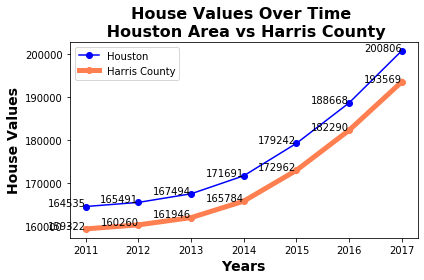

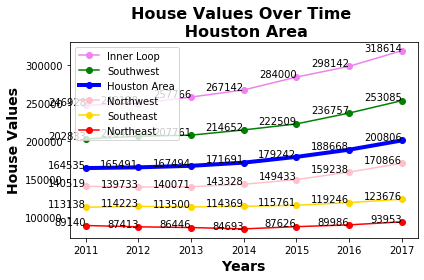

In [8]:
### Plot trends 
## Plot line graph House Value over time for Harris County and Houston Area
plt.figure(0)
median_value_2017=census_value_cost_2017_clean['Median Value'].mean()
median_value_2016=census_value_cost_2016_clean['Median Value'].mean()
median_value_2015=census_value_cost_2015_clean['Median Value'].mean()
median_value_2014=census_value_cost_2014_clean['Median Value'].mean()
median_value_2013=census_value_cost_2013_clean['Median Value'].mean()
median_value_2012=census_value_cost_2012_clean['Median Value'].mean()
median_value_2011=census_value_cost_2011_clean['Median Value'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
media_value_list = [median_value_2011,median_value_2012,median_value_2013,median_value_2014,median_value_2015,median_value_2016,median_value_2017]
year_list=['2011','2012','2013','2014','2015','2016','2017']
plt.plot(range(len(year_list)), houston_area_list[5], marker='o',label="Houston",color="blue") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[5]):
    ax.text(i, v, "%d" %v, ha="right")
plt.plot(range(len(year_list)), media_value_list, marker='o', label="Harris County",color="coral",linewidth=5) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(media_value_list):
    ax.text(i, v, "%d" %v, ha="right")
plt.legend(loc="best")
plt.title("House Values Over Time \n Houston Area vs Harris County",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('House Values',fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig('C:\workspace\Resources\Graph_Line_House_Value_Harris.png')

## Plot line graph House Value over time for Houston Area
plt.figure(1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), houston_area_list[0], marker='o', label="Inner Loop",color="violet") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[0]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_area_list[4], marker='o', label="Southwest",color="green") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[4]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_area_list[5], marker='o',label="Houston Area",color="blue",linewidth=4) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[5]):
    ax2.text(i, v, "%d" %v, fontsize=10,ha="right")

plt.plot(range(len(year_list)), houston_area_list[2], marker='o', label="Northwest",color="pink") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[2]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_area_list[3], marker='o', label="Southeast",color="gold") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[3]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_area_list[1], marker='o', label="Northeast",color="red") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_area_list[1]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.legend(loc="upper left")
plt.title("House Values Over Time \n Houston Area",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('House Values',fontsize=14, fontweight="bold")
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 6]
plt.savefig('Graph_Line_House_Value_Houston.png')

<Figure size 504x432 with 0 Axes>

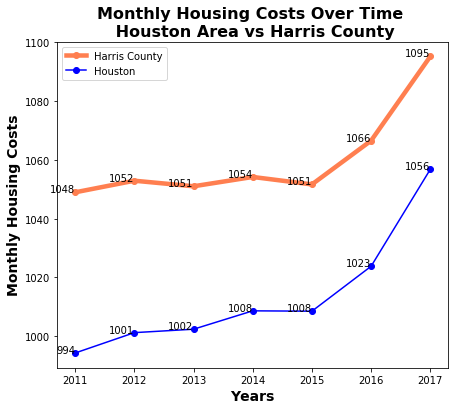

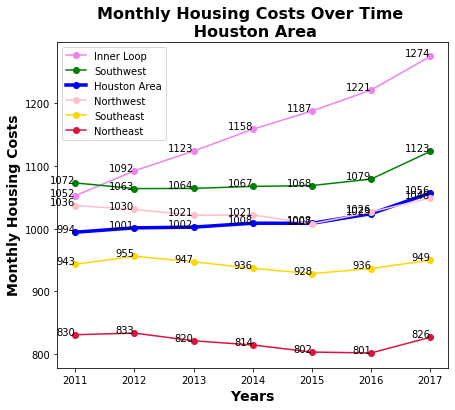

In [9]:
plt.figure(1)
median_cost_2017=census_value_cost_2017_clean['Median monthly housing costs'].mean()
median_cost_2016=census_value_cost_2016_clean['Median monthly housing costs'].mean()
median_cost_2015=census_value_cost_2015_clean['Median monthly housing costs'].mean()
median_cost_2014=census_value_cost_2014_clean['Median monthly housing costs'].mean()
median_cost_2013=census_value_cost_2013_clean['Median monthly housing costs'].mean()
median_cost_2012=census_value_cost_2012_clean['Median monthly housing costs'].mean()
median_cost_2011=census_value_cost_2011_clean['Median monthly housing costs'].mean()

fig = plt.figure()
ax = fig.add_subplot(111)
median_cost_list = [median_cost_2011,median_cost_2012,median_cost_2013,median_cost_2014,median_cost_2015,median_cost_2016,median_cost_2017]
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), median_cost_list, marker='o', label="Harris County",color="coral",linewidth=4.5) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(median_cost_list):
    ax.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_cost_list[5], marker='o',label="Houston",color="blue") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[5]):
    ax.text(i, v, "%d" %v, ha="right")

plt.legend(loc="best")
plt.title("Monthly Housing Costs Over Time \n Houston Area vs Harris County",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('Monthly Housing Costs',fontsize=14, fontweight="bold")

plt.savefig('C:\workspace\Resources\Graph_Line_Monthly_Housing_Cost_Harris.png')

## Plot line graph house values over time for Houston Area
plt.figure(1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
year_list=['2011','2012','2013','2014','2015','2016','2017']

plt.plot(range(len(year_list)), houston_cost_list[0], marker='o', label="Inner Loop",color="violet") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[0]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_cost_list[4], marker='o', label="Southwest",color="green") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[4]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_cost_list[5], marker='o',label="Houston Area",color="blue",linewidth=3.5) # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[5]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_cost_list[2], marker='o', label="Northwest",color="pink") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[2]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.plot(range(len(year_list)), houston_cost_list[3], marker='o', label="Southeast",color="gold") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[3]):
    ax2.text(i, v, "%d" %v, ha="right")
    
plt.plot(range(len(year_list)), houston_cost_list[1], marker='o', label="Northeast",color="crimson") # Plotting data
plt.xticks(range(len(year_list)), year_list) # Redefining x-axis labels
for i, v in enumerate(houston_cost_list[1]):
    ax2.text(i, v, "%d" %v, ha="right")

plt.legend(loc="upper left")
plt.title("Monthly Housing Costs Over Time \n Houston Area",fontsize=16, fontweight="bold")
plt.xlabel('Years',fontsize=14, fontweight="bold")
plt.ylabel('Monthly Housing Costs',fontsize=14, fontweight="bold")

plt.savefig('Graph_Line_Monthly_Housing_Cost_Houston.png')

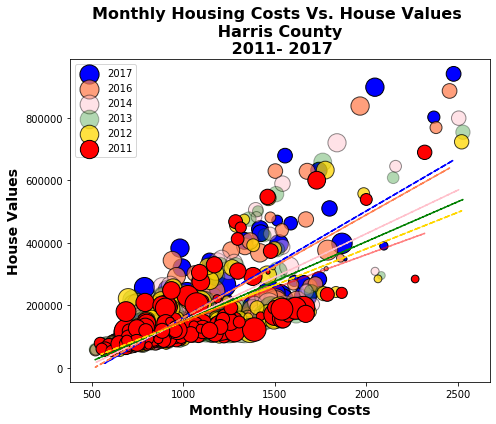

In [10]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
plt.scatter(census_value_cost_2017_clean["Median monthly housing costs"],
           census_value_cost_2017_clean["Median Value"],
           s=census_value_cost_2017_clean["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")
(slope, intercept, _, _, _) = linregress(census_value_cost_2017_clean["Median monthly housing costs"],census_value_cost_2017_clean["Median Value"])
fit = slope * census_value_cost_2017_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2017_clean["Median monthly housing costs"], fit, 'b--',color='blue')

plt.scatter(census_value_cost_2016_clean["Median monthly housing costs"],
           census_value_cost_2016_clean["Median Value"],
           s=census_value_cost_2016_clean["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_value_cost_2016_clean["Median monthly housing costs"],census_value_cost_2016_clean["Median Value"])
fit = slope * census_value_cost_2016_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2016_clean["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(census_value_cost_2014_clean["Median monthly housing costs"],
           census_value_cost_2014_clean["Median Value"],
           s=census_value_cost_2014_clean["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="pink", alpha=0.45)
(slope, intercept, _, _, _) = linregress(census_value_cost_2014_clean["Median monthly housing costs"],census_value_cost_2014_clean["Median Value"])
fit = slope * census_value_cost_2014_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2014_clean["Median monthly housing costs"], fit, 'b--',color='pink')

plt.scatter(census_value_cost_2013_clean["Median monthly housing costs"],
           census_value_cost_2013_clean["Median Value"],
           s=census_value_cost_2013_clean["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(census_value_cost_2013_clean["Median monthly housing costs"],census_value_cost_2013_clean["Median Value"])
fit = slope * census_value_cost_2013_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2013_clean["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(census_value_cost_2012_clean["Median monthly housing costs"],
           census_value_cost_2012_clean["Median Value"],
           s=census_value_cost_2012_clean["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(census_value_cost_2012_clean["Median monthly housing costs"],census_value_cost_2012_clean["Median Value"])
fit = slope * census_value_cost_2012_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2012_clean["Median monthly housing costs"], fit, 'b--',color='gold')

plt.scatter(census_value_cost_2011_clean["Median monthly housing costs"],
           census_value_cost_2011_clean["Median Value"],
           s=census_value_cost_2011_clean["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(census_value_cost_2011_clean["Median monthly housing costs"],census_value_cost_2011_clean["Median Value"])
fit = slope * census_value_cost_2011_clean["Median monthly housing costs"] + intercept
plt.plot(census_value_cost_2011_clean["Median monthly housing costs"], fit, 'b--',color='red', alpha=0.5)

plt.title("Monthly Housing Costs Vs. House Values \n Harris County \n 2011- 2017", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10, 8]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost.png')
plt.show()


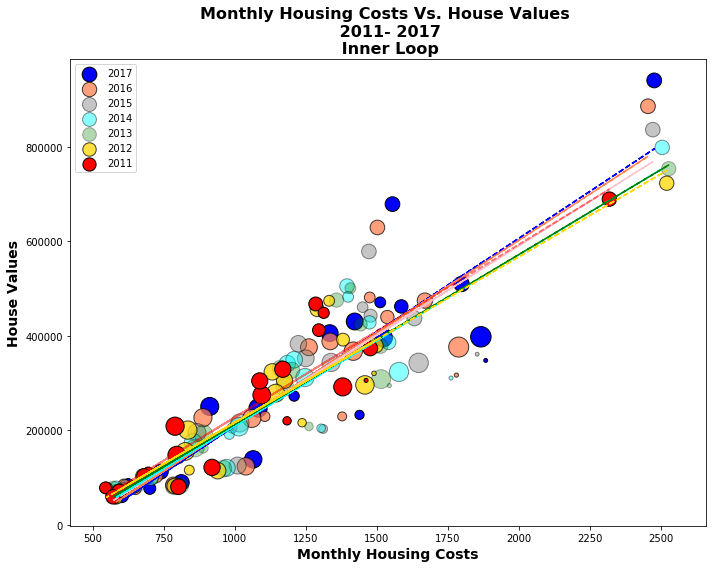

In [11]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
## For Inner Loop
plt.figure(4)
plt.scatter(value_houston_innerloop_2017["Median monthly housing costs"],
           value_houston_innerloop_2017["Median Value"],
           s=value_houston_innerloop_2017["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2017["Median monthly housing costs"],value_houston_innerloop_2017["Median Value"])
fit = slope * value_houston_innerloop_2017["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2017["Median monthly housing costs"], fit, 'b--',color='blue')

plt.scatter(value_houston_innerloop_2016["Median monthly housing costs"],
           value_houston_innerloop_2016["Median Value"],
           s=value_houston_innerloop_2016["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2016["Median monthly housing costs"],value_houston_innerloop_2016["Median Value"])
fit = slope * value_houston_innerloop_2016["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2016["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(value_houston_innerloop_2015["Median monthly housing costs"],
           value_houston_innerloop_2015["Median Value"],
           s=value_houston_innerloop_2015["Total Housing Unit"]/50,
           edgecolor= "black",label="2015",
           c="gray", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2015["Median monthly housing costs"],value_houston_innerloop_2015["Median Value"])
fit = slope * value_houston_innerloop_2015["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2015["Median monthly housing costs"], fit, 'b--',color='pink')

plt.scatter(value_houston_innerloop_2014["Median monthly housing costs"],
           value_houston_innerloop_2014["Median Value"],
           s=value_houston_innerloop_2014["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="cyan", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2014["Median monthly housing costs"],value_houston_innerloop_2014["Median Value"])
fit = slope * value_houston_innerloop_2014["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2014["Median monthly housing costs"], fit, 'b--',color='cyan')

plt.scatter(value_houston_innerloop_2013["Median monthly housing costs"],
           value_houston_innerloop_2013["Median Value"],
           s=value_houston_innerloop_2013["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2013["Median monthly housing costs"],value_houston_innerloop_2013["Median Value"])
fit = slope * value_houston_innerloop_2013["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2013["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(value_houston_innerloop_2012["Median monthly housing costs"],
           value_houston_innerloop_2012["Median Value"],
           s=value_houston_innerloop_2012["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2012["Median monthly housing costs"],value_houston_innerloop_2012["Median Value"])
fit = slope * value_houston_innerloop_2012["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2012["Median monthly housing costs"], fit, 'b--',color='gold')

plt.scatter(value_houston_innerloop_2011["Median monthly housing costs"],
           value_houston_innerloop_2011["Median Value"],
           s=value_houston_innerloop_2011["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(value_houston_innerloop_2011["Median monthly housing costs"],value_houston_innerloop_2011["Median Value"])
fit = slope * value_houston_innerloop_2011["Median monthly housing costs"] + intercept
plt.plot(value_houston_innerloop_2011["Median monthly housing costs"], fit, 'b--',color='red', alpha=0.5)

plt.title("Monthly Housing Costs Vs. House Values \n 2011- 2017\n Inner Loop", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 5]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost_Inner.png.png')
plt.show()

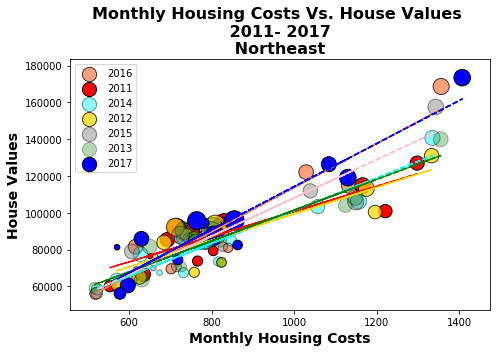

In [12]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
## For Northeast
plt.figure(5)

plt.scatter(value_houston_northeast_2016["Median monthly housing costs"],
           value_houston_northeast_2016["Median Value"],
           s=value_houston_northeast_2016["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2016["Median monthly housing costs"],value_houston_northeast_2016["Median Value"])
fit = slope * value_houston_northeast_2016["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2016["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(value_houston_northeast_2011["Median monthly housing costs"],
           value_houston_northeast_2011["Median Value"],
           s=value_houston_northeast_2011["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2011["Median monthly housing costs"],value_houston_northeast_2011["Median Value"])
fit = slope * value_houston_northeast_2011["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2011["Median monthly housing costs"], fit, 'b--',color='red', alpha=1)

plt.scatter(value_houston_northeast_2014["Median monthly housing costs"],
           value_houston_northeast_2014["Median Value"],
           s=value_houston_northeast_2014["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="cyan", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2014["Median monthly housing costs"],value_houston_northeast_2014["Median Value"])
fit = slope * value_houston_northeast_2014["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2014["Median monthly housing costs"], fit, 'b--',color='cyan')

plt.scatter(value_houston_northeast_2012["Median monthly housing costs"],
           value_houston_northeast_2012["Median Value"],
           s=value_houston_northeast_2012["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2012["Median monthly housing costs"],value_houston_northeast_2012["Median Value"])
fit = slope * value_houston_northeast_2012["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2012["Median monthly housing costs"], fit, 'b--',color='gold')

plt.scatter(value_houston_northeast_2015["Median monthly housing costs"],
           value_houston_northeast_2015["Median Value"],
           s=value_houston_northeast_2015["Total Housing Unit"]/50,
           edgecolor= "black",label="2015",
           c="gray", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2015["Median monthly housing costs"],value_houston_northeast_2015["Median Value"])
fit = slope * value_houston_northeast_2015["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2015["Median monthly housing costs"], fit, 'b--',color='pink')

plt.scatter(value_houston_northeast_2013["Median monthly housing costs"],
           value_houston_northeast_2013["Median Value"],
           s=value_houston_northeast_2013["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2013["Median monthly housing costs"],value_houston_northeast_2013["Median Value"])
fit = slope * value_houston_northeast_2013["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2013["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(value_houston_northeast_2017["Median monthly housing costs"],
           value_houston_northeast_2017["Median Value"],
           s=value_houston_northeast_2017["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")
(slope, intercept, _, _, _) = linregress(value_houston_northeast_2017["Median monthly housing costs"],value_houston_northeast_2017["Median Value"])
fit = slope * value_houston_northeast_2017["Median monthly housing costs"] + intercept
plt.plot(value_houston_northeast_2017["Median monthly housing costs"], fit, 'b--',color='blue')

plt.title("Monthly Housing Costs Vs. House Values \n 2011- 2017 \n Northeast ", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 5]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost_Northeast.png.png')
plt.show()

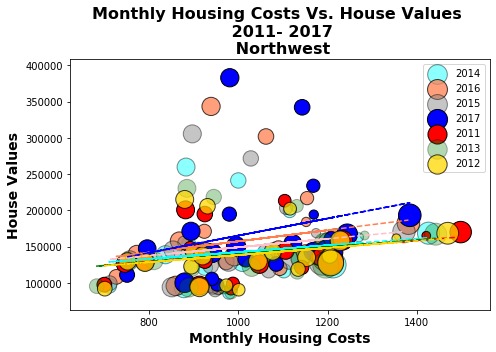

In [13]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
## For Northwest
plt.figure(6)

plt.scatter(value_houston_northwest_2014["Median monthly housing costs"],
           value_houston_northwest_2014["Median Value"],
           s=value_houston_northwest_2014["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="cyan", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2014["Median monthly housing costs"],value_houston_northwest_2014["Median Value"])
fit = slope * value_houston_northwest_2014["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2014["Median monthly housing costs"], fit, 'b--',color='cyan')

plt.scatter(value_houston_northwest_2016["Median monthly housing costs"],
           value_houston_northwest_2016["Median Value"],
           s=value_houston_northwest_2016["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2016["Median monthly housing costs"],value_houston_northwest_2016["Median Value"])
fit = slope * value_houston_northwest_2016["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2016["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(value_houston_northwest_2015["Median monthly housing costs"],
           value_houston_northwest_2015["Median Value"],
           s=value_houston_northwest_2015["Total Housing Unit"]/50,
           edgecolor= "black",label="2015",
           c="gray", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2015["Median monthly housing costs"],value_houston_northwest_2015["Median Value"])
fit = slope * value_houston_northwest_2015["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2015["Median monthly housing costs"], fit, 'b--',color='pink')
plt.scatter(value_houston_northwest_2017["Median monthly housing costs"],
           value_houston_northwest_2017["Median Value"],
           s=value_houston_northwest_2017["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")

plt.scatter(value_houston_northwest_2011["Median monthly housing costs"],
           value_houston_northwest_2011["Median Value"],
           s=value_houston_northwest_2011["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2011["Median monthly housing costs"],value_houston_northwest_2011["Median Value"])
fit = slope * value_houston_northwest_2011["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2011["Median monthly housing costs"], fit, 'b--',color='red', alpha=1)

(slope, intercept, _, _, _) = linregress(value_houston_northwest_2017["Median monthly housing costs"],value_houston_northwest_2017["Median Value"])
fit = slope * value_houston_northwest_2017["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2017["Median monthly housing costs"], fit, 'b--',color='blue')

plt.scatter(value_houston_northwest_2013["Median monthly housing costs"],
           value_houston_northwest_2013["Median Value"],
           s=value_houston_northwest_2013["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2013["Median monthly housing costs"],value_houston_northwest_2013["Median Value"])
fit = slope * value_houston_northwest_2013["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2013["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(value_houston_northwest_2012["Median monthly housing costs"],
           value_houston_northwest_2012["Median Value"],
           s=value_houston_northwest_2012["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_northwest_2012["Median monthly housing costs"],value_houston_northwest_2012["Median Value"])
fit = slope * value_houston_northwest_2012["Median monthly housing costs"] + intercept
plt.plot(value_houston_northwest_2012["Median monthly housing costs"], fit, 'b--',color='gold')

plt.title("Monthly Housing Costs Vs. House Values \n 2011- 2017\n Northwest", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 5]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost_Northwest.png.png')
plt.show()

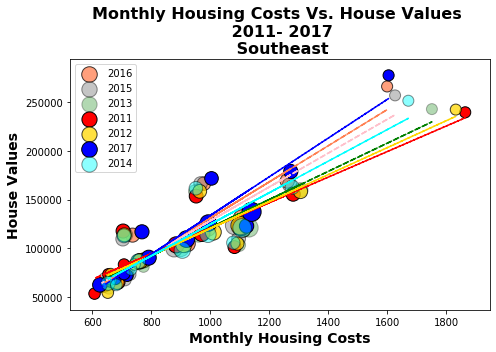

In [14]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
## For Southeast
plt.figure(7)

plt.scatter(value_houston_southeast_2016["Median monthly housing costs"],
           value_houston_southeast_2016["Median Value"],
           s=value_houston_southeast_2016["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2016["Median monthly housing costs"],value_houston_southeast_2016["Median Value"])
fit = slope * value_houston_southeast_2016["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2016["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(value_houston_southeast_2015["Median monthly housing costs"],
           value_houston_southeast_2015["Median Value"],
           s=value_houston_southeast_2015["Total Housing Unit"]/50,
           edgecolor= "black",label="2015",
           c="gray", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2015["Median monthly housing costs"],value_houston_southeast_2015["Median Value"])
fit = slope * value_houston_southeast_2015["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2015["Median monthly housing costs"], fit, 'b--',color='pink')

plt.scatter(value_houston_southeast_2013["Median monthly housing costs"],
           value_houston_southeast_2013["Median Value"],
           s=value_houston_southeast_2013["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2013["Median monthly housing costs"],value_houston_southeast_2013["Median Value"])
fit = slope * value_houston_southeast_2013["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2013["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(value_houston_southeast_2011["Median monthly housing costs"],
           value_houston_southeast_2011["Median Value"],
           s=value_houston_southeast_2011["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2011["Median monthly housing costs"],value_houston_southeast_2011["Median Value"])
fit = slope * value_houston_southeast_2011["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2011["Median monthly housing costs"], fit, 'b--',color='red', alpha=1)

plt.scatter(value_houston_southeast_2012["Median monthly housing costs"],
           value_houston_southeast_2012["Median Value"],
           s=value_houston_southeast_2012["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2012["Median monthly housing costs"],value_houston_southeast_2012["Median Value"])
fit = slope * value_houston_southeast_2012["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2012["Median monthly housing costs"], fit, 'b--',color='gold')

plt.scatter(value_houston_southeast_2017["Median monthly housing costs"],
           value_houston_southeast_2017["Median Value"],
           s=value_houston_southeast_2017["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2017["Median monthly housing costs"],value_houston_southeast_2017["Median Value"])
fit = slope * value_houston_southeast_2017["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2017["Median monthly housing costs"], fit, 'b--',color='blue')

plt.scatter(value_houston_southeast_2014["Median monthly housing costs"],
           value_houston_southeast_2014["Median Value"],
           s=value_houston_southeast_2014["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="cyan", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_southeast_2014["Median monthly housing costs"],value_houston_southeast_2014["Median Value"])
fit = slope * value_houston_southeast_2014["Median monthly housing costs"] + intercept
plt.plot(value_houston_southeast_2014["Median monthly housing costs"], fit, 'b--',color='cyan')


plt.title("Monthly Housing Costs Vs. House Values \n 2011- 2017\n Southeast", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 5]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost_Southeast.png.png')
plt.show()

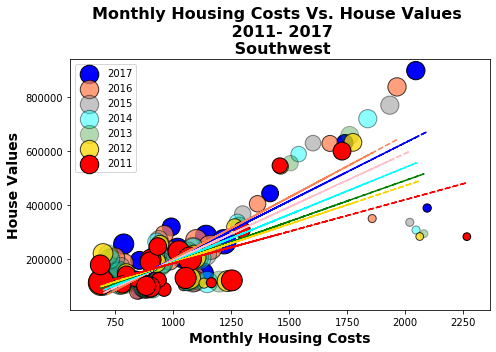

In [15]:
### Plot relationship between
## House Value vs Monthly Housing Cost with regression lines
## For Southwest
plt.figure(7)
plt.scatter(value_houston_southwest_2017["Median monthly housing costs"],
           value_houston_southwest_2017["Median Value"],
           s=value_houston_southwest_2017["Total Housing Unit"]/50,
           edgecolor= "black", label="2017",
           c="blue")
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2017["Median monthly housing costs"],value_houston_southwest_2017["Median Value"])
fit = slope * value_houston_southwest_2017["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2017["Median monthly housing costs"], fit, 'b--',color='blue')

plt.scatter(value_houston_southwest_2016["Median monthly housing costs"],
           value_houston_southwest_2016["Median Value"],
           s=value_houston_southwest_2016["Total Housing Unit"]/50,
           edgecolor= "black",label="2016",
           c="coral", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2016["Median monthly housing costs"],value_houston_southwest_2016["Median Value"])
fit = slope * value_houston_southwest_2016["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2016["Median monthly housing costs"], fit, 'b--',color='coral')

plt.scatter(value_houston_southwest_2015["Median monthly housing costs"],
           value_houston_southwest_2015["Median Value"],
           s=value_houston_southwest_2015["Total Housing Unit"]/50,
           edgecolor= "black",label="2015",
           c="gray", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2015["Median monthly housing costs"],value_houston_southwest_2015["Median Value"])
fit = slope * value_houston_southwest_2015["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2015["Median monthly housing costs"], fit, 'b--',color='pink')

plt.scatter(value_houston_southwest_2014["Median monthly housing costs"],
           value_houston_southwest_2014["Median Value"],
           s=value_houston_southwest_2014["Total Housing Unit"]/50,
           edgecolor= "black",label="2014",
           c="cyan", alpha=0.45)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2014["Median monthly housing costs"],value_houston_southwest_2014["Median Value"])
fit = slope * value_houston_southwest_2014["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2014["Median monthly housing costs"], fit, 'b--',color='cyan')

plt.scatter(value_houston_southwest_2013["Median monthly housing costs"],
           value_houston_southwest_2013["Median Value"],
           s=value_houston_southwest_2013["Total Housing Unit"]/50,
           edgecolor= "black",label="2013",
           c="green", alpha=0.30)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2013["Median monthly housing costs"],value_houston_southwest_2013["Median Value"])
fit = slope * value_houston_southwest_2013["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2013["Median monthly housing costs"], fit, 'b--',color='green')

plt.scatter(value_houston_southwest_2012["Median monthly housing costs"],
           value_houston_southwest_2012["Median Value"],
           s=value_houston_southwest_2012["Total Housing Unit"]/50,
           edgecolor= "black",label="2012",
           c="gold", alpha=0.75)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2012["Median monthly housing costs"],value_houston_southwest_2012["Median Value"])
fit = slope * value_houston_southwest_2012["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2012["Median monthly housing costs"], fit, 'b--',color='gold')

plt.scatter(value_houston_southwest_2011["Median monthly housing costs"],
           value_houston_southwest_2011["Median Value"],
           s=value_houston_southwest_2011["Total Housing Unit"]/50,
           edgecolor= "black",label="2011",
           c="red", alpha=1)
(slope, intercept, _, _, _) = linregress(value_houston_southwest_2011["Median monthly housing costs"],value_houston_southwest_2011["Median Value"])
fit = slope * value_houston_southwest_2011["Median monthly housing costs"] + intercept
plt.plot(value_houston_southwest_2011["Median monthly housing costs"], fit, 'b--',color='red', alpha=1)

plt.title("Monthly Housing Costs Vs. House Values \n 2011- 2017\n Southwest", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Housing Costs",fontsize=14, fontweight="bold")
plt.ylabel("House Values",fontsize=14, fontweight="bold")
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [7, 5]
plt.savefig('Graph_Scatter_Monthly_Housing_Cost_Southwest.png.png')
plt.show()

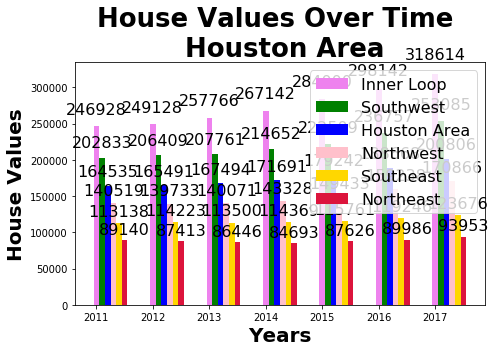

In [16]:
### Plot house values in Houston Area using bar chart
x_axis = np.arange(len(houston_area_list[5]))  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

innerloop = ax.bar(x_axis, houston_area_list[0], width, color='violet')

southwest = ax.bar(x_axis+width, houston_area_list[4], width, color='green')

value_houston = ax.bar(x_axis+width*2, houston_area_list[5], width, color='blue')

northwest = ax.bar(x_axis+width*3, houston_area_list[2], width, color='pink')

southeast = ax.bar(x_axis+width*4, houston_area_list[3], width, color='gold')

northeast = ax.bar(x_axis+width*5, houston_area_list[1], width, color='crimson')



ax.set_title('House Values Over Time \n Houston Area',fontsize=26, fontweight="bold")
ax.set_ylabel('House Values',fontsize=20, fontweight="bold")
ax.set_xlabel('Years',fontsize=20, fontweight="bold")
ax.set_xticks(x_axis)
ax.set_xticklabels( ("2011", "2012", "2013", "2014", "2015","2016","2017") )
ax.legend( (innerloop[0], southwest[0], value_houston[0], northwest[0],southeast[0],northeast[0]), ( 'Inner Loop','Southwest','Houston Area', 'Northwest','Southeast', 'Northeast'), fontsize=16 )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', fontsize=16, va='bottom')

autolabel(value_houston)
autolabel(southwest)
autolabel(southeast)
autolabel(northwest)
autolabel(northeast)
autolabel(innerloop)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [14.4, 12.8]
plt.savefig('Graph_Bar_House_Value_Houston.png')
plt.show()

In [17]:
# Run test on Pearson correlation coefficient

r_2011=np.corrcoef(census_value_cost_2011_clean["Median monthly housing costs"], census_value_cost_2011_clean["Median Value"])[0, 1]
r_2012=np.corrcoef(census_value_cost_2012_clean["Median monthly housing costs"], census_value_cost_2012_clean["Median Value"])[0, 1]
r_2013=np.corrcoef(census_value_cost_2013_clean["Median monthly housing costs"], census_value_cost_2013_clean["Median Value"])[0, 1]
r_2014=np.corrcoef(census_value_cost_2014_clean["Median monthly housing costs"], census_value_cost_2014_clean["Median Value"])[0, 1]
r_2015=np.corrcoef(census_value_cost_2015_clean["Median monthly housing costs"], census_value_cost_2015_clean["Median Value"])[0, 1]
r_2016=np.corrcoef(census_value_cost_2016_clean["Median monthly housing costs"], census_value_cost_2016_clean["Median Value"])[0, 1]
r_2017=np.corrcoef(census_value_cost_2017_clean["Median monthly housing costs"], census_value_cost_2017_clean["Median Value"])[0, 1]

year_list_r_value=[2017,2016,2015,2014,2013,2012,2011]

r_value_harris=[r_2011,r_2012,r_2013,r_2014,r_2015,r_2017,r_2017]

r_sumary_harris=pd.DataFrame({'Years': year_list_r_value,'Pearson Correlation Coefficient Harris':r_value_harris})
r_sumary_harris

,Years,Pearson Correlation Coefficient Harris
0,2017,0.672376
1,2016,0.704763
2,2015,0.735871
3,2014,0.756032
4,2013,0.790489
5,2012,0.807900
6,2011,0.807900


In [19]:
# Run r test Houston Area
r_2011_inner=np.corrcoef(value_houston_innerloop_2011['Median monthly housing costs'], value_houston_innerloop_2011["Median Value"])[0, 1]
r_2012_inner=np.corrcoef(value_houston_innerloop_2012['Median monthly housing costs'], value_houston_innerloop_2012["Median Value"])[0, 1]
r_2013_inner=np.corrcoef(value_houston_innerloop_2013['Median monthly housing costs'], value_houston_innerloop_2013["Median Value"])[0, 1]
r_2014_inner=np.corrcoef(value_houston_innerloop_2014['Median monthly housing costs'], value_houston_innerloop_2014["Median Value"])[0, 1]
r_2015_inner=np.corrcoef(value_houston_innerloop_2015['Median monthly housing costs'], value_houston_innerloop_2015["Median Value"])[0, 1]
r_2016_inner=np.corrcoef(value_houston_innerloop_2016['Median monthly housing costs'], value_houston_innerloop_2016["Median Value"])[0, 1]
r_2017_inner=np.corrcoef(value_houston_innerloop_2017['Median monthly housing costs'], value_houston_innerloop_2017["Median Value"])[0, 1]

r_2011_northeast=np.corrcoef(value_houston_northeast_2011['Median monthly housing costs'], value_houston_northeast_2011["Median Value"])[0, 1]
r_2012_northeast=np.corrcoef(value_houston_northeast_2012['Median monthly housing costs'], value_houston_northeast_2012["Median Value"])[0, 1]
r_2013_northeast=np.corrcoef(value_houston_northeast_2013['Median monthly housing costs'], value_houston_northeast_2013["Median Value"])[0, 1]
r_2014_northeast=np.corrcoef(value_houston_northeast_2014['Median monthly housing costs'], value_houston_northeast_2014["Median Value"])[0, 1]
r_2015_northeast=np.corrcoef(value_houston_northeast_2015['Median monthly housing costs'], value_houston_northeast_2015["Median Value"])[0, 1]
r_2016_northeast=np.corrcoef(value_houston_northeast_2016['Median monthly housing costs'], value_houston_northeast_2016["Median Value"])[0, 1]
r_2017_northeast=np.corrcoef(value_houston_northeast_2017['Median monthly housing costs'], value_houston_northeast_2017["Median Value"])[0, 1]

r_2011_northwest=np.corrcoef(value_houston_northwest_2011['Median monthly housing costs'], value_houston_northwest_2011["Median Value"])[0, 1]
r_2012_northwest=np.corrcoef(value_houston_northwest_2012['Median monthly housing costs'], value_houston_northwest_2012["Median Value"])[0, 1]
r_2013_northwest=np.corrcoef(value_houston_northwest_2013['Median monthly housing costs'], value_houston_northwest_2013["Median Value"])[0, 1]
r_2014_northwest=np.corrcoef(value_houston_northwest_2014['Median monthly housing costs'], value_houston_northwest_2014["Median Value"])[0, 1]
r_2015_northwest=np.corrcoef(value_houston_northwest_2015['Median monthly housing costs'], value_houston_northwest_2015["Median Value"])[0, 1]
r_2016_northwest=np.corrcoef(value_houston_northwest_2016['Median monthly housing costs'], value_houston_northwest_2016["Median Value"])[0, 1]
r_2017_northwest=np.corrcoef(value_houston_northwest_2017['Median monthly housing costs'], value_houston_northwest_2017["Median Value"])[0, 1]

r_2011_southeast=np.corrcoef(value_houston_southeast_2011['Median monthly housing costs'], value_houston_southeast_2011["Median Value"])[0, 1]
r_2012_southeast=np.corrcoef(value_houston_southeast_2012['Median monthly housing costs'], value_houston_southeast_2012["Median Value"])[0, 1]
r_2013_southeast=np.corrcoef(value_houston_southeast_2013['Median monthly housing costs'], value_houston_southeast_2013["Median Value"])[0, 1]
r_2014_southeast=np.corrcoef(value_houston_southeast_2014['Median monthly housing costs'], value_houston_southeast_2014["Median Value"])[0, 1]
r_2015_southeast=np.corrcoef(value_houston_southeast_2015['Median monthly housing costs'], value_houston_southeast_2015["Median Value"])[0, 1]
r_2016_southeast=np.corrcoef(value_houston_southeast_2016['Median monthly housing costs'], value_houston_southeast_2016["Median Value"])[0, 1]
r_2017_southeast=np.corrcoef(value_houston_southeast_2017['Median monthly housing costs'], value_houston_southeast_2017["Median Value"])[0, 1]

r_2011_southwest=np.corrcoef(value_houston_southwest_2011['Median monthly housing costs'], value_houston_southwest_2011["Median Value"])[0, 1]
r_2012_southwest=np.corrcoef(value_houston_southwest_2012['Median monthly housing costs'], value_houston_southwest_2012["Median Value"])[0, 1]
r_2013_southwest=np.corrcoef(value_houston_southwest_2013['Median monthly housing costs'], value_houston_southwest_2013["Median Value"])[0, 1]
r_2014_southwest=np.corrcoef(value_houston_southwest_2014['Median monthly housing costs'], value_houston_southwest_2014["Median Value"])[0, 1]
r_2015_southwest=np.corrcoef(value_houston_southwest_2015['Median monthly housing costs'], value_houston_southwest_2015["Median Value"])[0, 1]
r_2016_southwest=np.corrcoef(value_houston_southwest_2016['Median monthly housing costs'], value_houston_southwest_2016["Median Value"])[0, 1]
r_2017_southwest=np.corrcoef(value_houston_southwest_2017['Median monthly housing costs'], value_houston_southwest_2017["Median Value"])[0, 1]

r_value_inner=[r_2017_inner,r_2016_inner,r_2015_inner,r_2014_inner,r_2013_inner,r_2012_inner,r_2011_inner]
r_value_northeast=[r_2017_northeast,r_2016_northeast,r_2015_northeast,r_2014_northeast,r_2013_northeast,r_2012_northeast,r_2011_northeast]
r_value_northwest=[r_2017_northwest,r_2016_northwest,r_2015_northwest,r_2014_northwest,r_2013_northwest,r_2012_northwest,r_2011_northwest]
r_value_southeast=[r_2017_southeast,r_2016_southeast,r_2015_southeast,r_2014_southeast,r_2013_southeast,r_2012_southeast,r_2011_southeast]
r_value_southwest=[r_2017_southwest,r_2016_southwest,r_2015_southwest,r_2014_southwest,r_2013_southwest,r_2012_southwest,r_2011_southwest]

year_list_r_value=[2017,2016,2015,2014,2013,2012,2011]
r_sumary_houston=pd.DataFrame({'Years': year_list_r_value,
                               'Inner Loop r Value':r_value_inner,
                               'Northeast r Value':r_value_northeast,
                               'Northwest r Value':r_value_northwest,
                               'Southeast r Value':r_value_southeast,
                               'Southwest r Value':r_value_southwest})
r_sumary_houston


,Years,Inner Loop r Value,Northeast r Value,Northwest r Value,Southeast r Value,Southwest r Value
0,2017,0.893091,0.939029,0.259365,0.940989,0.832890
1,2016,0.901448,0.953807,0.197779,0.931451,0.851900
2,2015,0.915525,0.943285,0.175667,0.920826,0.808152
3,2014,0.914163,0.942737,0.185456,0.914162,0.743592
4,2013,0.928909,0.926858,0.239224,0.913115,0.701868
5,2012,0.931486,0.873221,0.271395,0.922193,0.679462
6,2011,0.930219,0.876705,0.300454,0.920874,0.632798
